## Creating and training a network classifier

### Data
The data used in this tutorial is the CIFAR10 dataset. It contains 10 classes
of images. ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’,
‘horse’, ‘ship’, ‘truck’. The images are of size 3 (channels) x 32 x 32 (n of
pixels)

In [34]:
import torch
import torchvision
import torchvision.transforms as transforms

In [48]:
# The transformation of the data consists in 
# 1) transforming the image to a tensor
# 2) Normalizing the tensors-> Normalize((mean[1], mean[2], mean[3]),
#                                        (std[1], std[2], std[3])) -> 3 channels

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [49]:
# Loading the data
batch_size = 8
trainset = torchvision.datasets.CIFAR10(root = "../data/cifar10/", train = True,
                                        download = True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size,
                                          shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root = "../data/cifar10", train = False,
                                       download=True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size,
                                         shuffle = True, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


torch.Size([3, 36, 274])


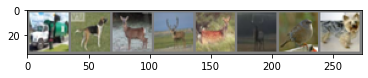

truck dog deer deer deer deer bird dog


In [50]:
# Ploting some training images
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img * 0.5 + 0.5 # unnormalize -> img * std + mean
    npimg = img.numpy()
    print(img.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # transposing the dims
    plt.show()


# getting random image
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]}' for j in range(batch_size)))

### Neural Network

In [51]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super().__init__()
        # in: 3 layers mxm out: 6 layers (m-4)x(m-4)
        self.conv1 = nn.Conv2d(3, 6, 5)
        # in: layers size n out: layers size n/2
        self.pool = nn.MaxPool2d(2, 2)
        # in: 6 layers mxm out 16 layers (m-4)x(mx4)

        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16*5*5, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [52]:
net = Net()

### Loss and optimizer

In [53]:
# using classification cross-entropy loss and SDG
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 2e-3, momentum = 0.9)

### Train loop

In [54]:
epochs = 12
loss_epoch = {}

for epoch in range(epochs):

    running_loss = 0.0
    loss_hist = [] 
    for i, data in enumerate(trainloader):

        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        loss_hist.append(loss.item())

        if (i+1)%250 == 0:
            print(f"Epoch: {epoch} - {i+1} - loss: {running_loss/250}")
            running_loss = 0.0

    loss_epoch[str(epoch)] = loss_hist

print("Finished training")

Epoch: 0 - 250 - loss: 2.305960078239441
Epoch: 0 - 500 - loss: 2.3039915275573732
Epoch: 0 - 750 - loss: 2.302669587135315
Epoch: 0 - 1000 - loss: 2.3002016525268556
Epoch: 0 - 1250 - loss: 2.298823152542114
Epoch: 0 - 1500 - loss: 2.289994475364685
Epoch: 0 - 1750 - loss: 2.2385293264389037
Epoch: 0 - 2000 - loss: 2.1068271331787107
Epoch: 0 - 2250 - loss: 2.0040768966674807
Epoch: 0 - 2500 - loss: 1.9360039615631104
Epoch: 0 - 2750 - loss: 1.8699928374290467
Epoch: 0 - 3000 - loss: 1.846358446121216
Epoch: 0 - 3250 - loss: 1.7703296823501586
Epoch: 0 - 3500 - loss: 1.718066405057907
Epoch: 0 - 3750 - loss: 1.6888174901008606
Epoch: 0 - 4000 - loss: 1.66448295879364
Epoch: 0 - 4250 - loss: 1.6533146228790283
Epoch: 0 - 4500 - loss: 1.6492410435676574
Epoch: 0 - 4750 - loss: 1.636520153284073
Epoch: 0 - 5000 - loss: 1.6038166768550872
Epoch: 0 - 5250 - loss: 1.6255978519916534
Epoch: 0 - 5500 - loss: 1.577076319217682
Epoch: 0 - 5750 - loss: 1.5457607237100601
Epoch: 0 - 6000 - loss: 

In [60]:
# Saving the model
PATH = "../data/cifar_net_mod2.pth"
torch.save(net.state_dict(), PATH)

### Testing

torch.Size([3, 36, 274])


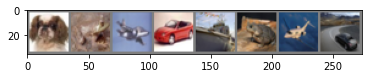

GroundTruth:  dog   frog  plane car   ship  frog  plane car  


In [61]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

In [65]:
# Loading the saved model
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [66]:
outputs = net(images)

In [67]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(8)))

Predicted:  dog   frog  plane car   ship  frog  plane deer 


In [68]:
# Testing the whole dataset
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 64.49 %


In [69]:
# Accuracy of each class
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 70.6 %
Accuracy for class: car   is 72.3 %
Accuracy for class: bird  is 43.4 %
Accuracy for class: cat   is 44.5 %
Accuracy for class: deer  is 60.0 %
Accuracy for class: dog   is 55.9 %
Accuracy for class: frog  is 77.2 %
Accuracy for class: horse is 68.1 %
Accuracy for class: ship  is 75.2 %
Accuracy for class: truck is 77.7 %
